In [1]:
from arima import ARIMAModel
import pandas as pd


In [2]:
df = pd.read_csv("gold_price_data.csv")

In [3]:
df

,Date,Value
0,1970-01-01,35.20
1,1970-04-01,35.10
2,1970-07-01,35.40
3,1970-10-01,36.20
4,1971-01-01,37.40
...,...,...
10782,2020-03-09,1672.50
10783,2020-03-10,1655.70
10784,2020-03-11,1653.75
10785,2020-03-12,1570.70


In [4]:
# # Crie uma função para converter as datas
# def convert_data(data_str):
#     # Mapeie os nomes dos meses para seus números equivalentes
#     meses = {'jan': 1, 'fev': 2, 'mar': 3, 'abr': 4, 'mai': 5, 'jun': 6, 'jul': 7, 'ago': 8, 'set': 9, 'out': 10, 'nov': 11, 'dez': 12}

#     # Divida a string da data em partes
#     partes = data_str.split('/')

#     # Converta o mês para um número
#     mes_num = meses[partes[0].lower()]

#     # Adicione o ano e o mês ao novo formato de data
#     nova_data = pd.to_datetime(f'20{partes[1]}-{mes_num:02d}')

#     return nova_data

# # Aplique a função de conversão à coluna 'data'
# df['data'] = df['data'].apply(convert_data)

# # Agora, 'data' está no formato de data e pode ser usada como índice para uma série temporal
# # df.set_index('data', inplace=True)

# # Agora você pode estudar a série temporal
# print(df)

In [5]:
df.set_index('Date', inplace=True)
df.columns = ["Value"]

df

,Value
Date,
1970-01-01,35.20
1970-04-01,35.10
1970-07-01,35.40
1970-10-01,36.20
1971-01-01,37.40
...,...
2020-03-09,1672.50
2020-03-10,1655.70
2020-03-11,1653.75


In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
model = ARIMAModel(df)

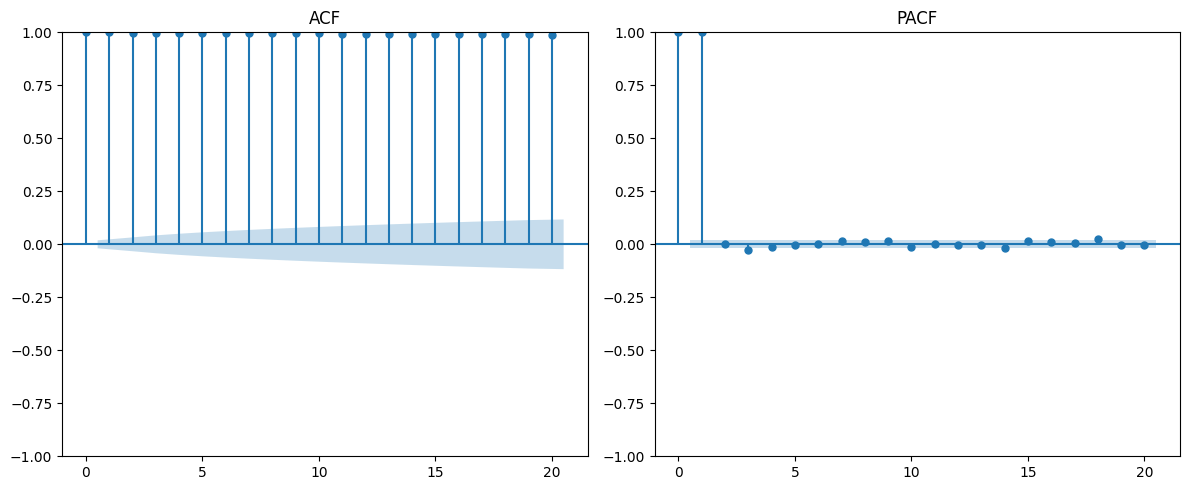

{'ADF Statistic': -0.07112124453813447,
 'p-value': 0.9522400769147394,
 'Critical Values': {'1%': -3.4309586221840513,
  '5%': -2.861808976860248,
  '10%': -2.566913171245489},
 'Is Stationary': False}

In [8]:
model.check_stationarity(df)

In [9]:
df_diff = model.difference(df)

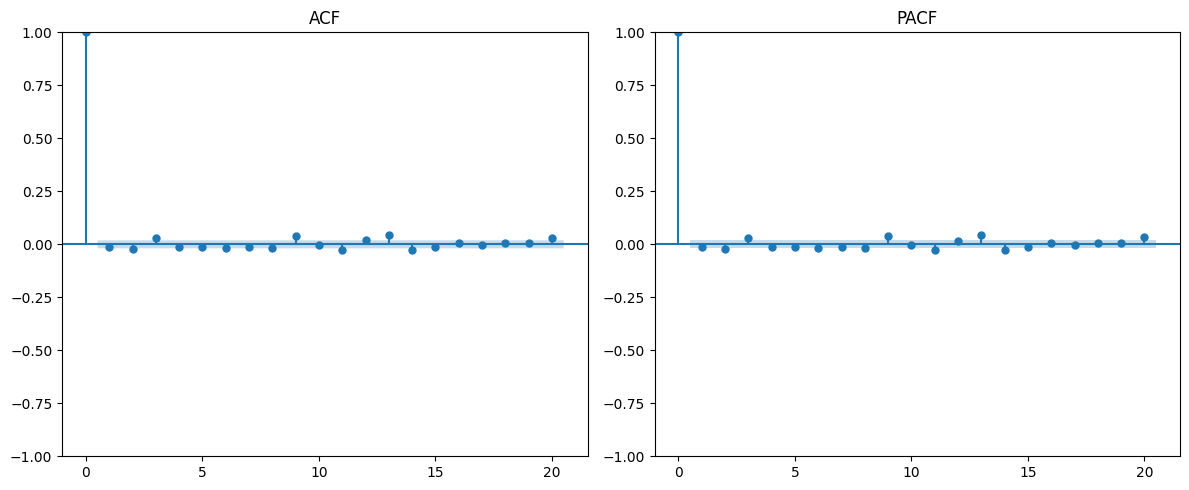

{'ADF Statistic': -17.568807521617348,
 'p-value': 4.0613743604469985e-30,
 'Critical Values': {'1%': -3.4309586221840513,
  '5%': -2.861808976860248,
  '10%': -2.566913171245489},
 'Is Stationary': True}

In [10]:
model.check_stationarity(df_diff)

In [11]:
model.grid_search(5,5,5)



Tentando ARIMA(0,1,0)...
ARIMA(0,1,0) -> MSE: 192642.11436283597
Tentando ARIMA(0,1,1)...
ARIMA(0,1,1) -> MSE: 192642.11436283597
Tentando ARIMA(0,1,2)...
ARIMA(0,1,2) -> MSE: 192642.11436283597
Tentando ARIMA(0,1,3)...
ARIMA(0,1,3) -> MSE: 192642.11436283597
Tentando ARIMA(0,1,4)...
ARIMA(0,1,4) -> MSE: 192642.11436283597
Tentando ARIMA(0,1,5)...
ARIMA(0,1,5) -> MSE: 192642.11436283597
Tentando ARIMA(1,1,0)...
ARIMA(1,1,0) -> MSE: 192491.5926616025
Tentando ARIMA(1,1,1)...
ARIMA(1,1,1) -> MSE: 192454.54136805344
Tentando ARIMA(1,1,2)...
ARIMA(1,1,2) -> MSE: 192457.4812568046
Tentando ARIMA(1,1,3)...
ARIMA(1,1,3) -> MSE: 192496.6985835711
Tentando ARIMA(1,1,4)...
ARIMA(1,1,4) -> MSE: 192367.6355640718
Tentando ARIMA(1,1,5)...
ARIMA(1,1,5) -> MSE: 192491.87564501815
Tentando ARIMA(2,1,0)...
ARIMA(2,1,0) -> MSE: 192228.66430958858
Tentando ARIMA(2,1,1)...
ARIMA(2,1,1) -> MSE: 191940.32239283988
Tentando ARIMA(2,1,2)...
ARIMA(2,1,2) -> MSE: 192457.51522992444
Tentando ARIMA(2,1,3)...
ARIM

{'Best Params': (2, 1, 1), 'Best MSE': 191940.32239283988}

In [15]:
coeficientes = model.fit(df, 2, 1, 1)

In [16]:
coeficientes

{'coeffs': array([0.9038745, 0.9038745, 0.       ]),
 'residuals': array([  0.22309778,   0.99843105,   1.74250014, ..., -13.89669399,
        -84.77194413, -65.44066648])}

In [14]:
model1 = ARIMAModel(series)

NameError: name 'series' is not defined

In [18]:
model.grid_search(3,3,3)

Tentando ARIMA(0,1,0)...
ARIMA(0,1,0) -> MSE: 192642.11436283597
Tentando ARIMA(0,1,1)...
ARIMA(0,1,1) -> MSE: 192642.11436283597
Tentando ARIMA(0,1,2)...
ARIMA(0,1,2) -> MSE: 192642.11436283597
Tentando ARIMA(0,1,3)...
ARIMA(0,1,3) -> MSE: 192642.11436283597
Tentando ARIMA(1,1,0)...
ARIMA(1,1,0) -> MSE: 192269.79544047685
Tentando ARIMA(1,1,1)...
ARIMA(1,1,1) -> MSE: 192207.74491293132
Tentando ARIMA(1,1,2)...
ARIMA(1,1,2) -> MSE: 192189.15128290848
Tentando ARIMA(1,1,3)...
ARIMA(1,1,3) -> MSE: 192496.6085363353
Tentando ARIMA(2,1,0)...
ARIMA(2,1,0) -> MSE: 191956.32996039808
Tentando ARIMA(2,1,1)...
ARIMA(2,1,1) -> MSE: 191443.1977908509
Tentando ARIMA(2,1,2)...
ARIMA(2,1,2) -> MSE: 192381.3452371212
Tentando ARIMA(2,1,3)...
ARIMA(2,1,3) -> MSE: 192396.44000600927
Tentando ARIMA(3,1,0)...
ARIMA(3,1,0) -> MSE: 192426.5711709541
Tentando ARIMA(3,1,1)...
ARIMA(3,1,1) -> MSE: 192649.71533717643
Tentando ARIMA(3,1,2)...
ARIMA(3,1,2) -> MSE: 192604.02574344206
Tentando ARIMA(3,1,3)...
ARIM

{'Best Params': (2, 1, 1), 'Best MSE': 191443.1977908509}